In [1]:
import pandas as pd
import yfinance as yf
from datetime import datetime
import rrg_toolkit as rrg
import matplotlib.pyplot as plt
import matplotlib as mpl

<Figure size 432x288 with 0 Axes>

In [2]:
# Load the ETF ticker symbols from Excel
tickers_df = pd.read_excel('tickers.xlsx')
etfs = tickers_df['Ticker'].tolist()

# Create a dictionary to map tickers to their full names
tickers_dict = dict(zip(tickers_df['Ticker'], tickers_df['Short Ticker Name']))

# Download the ETF prices from Yahoo Finance
start_date = "2020-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')
prices = rrg.get_etf_prices(etfs, start_date, end_date)

# Calculate the RS ratios relative to SPY
benchmark = "SPY"
rs_ratios = rrg.calculate_rs_ratios(prices, benchmark)

# Calculate the JDK RS ratios and momentums
jdk_rs_ratios = pd.DataFrame()
jdk_rs_momentums = pd.DataFrame()
for etf in etfs:
    jdk_rs_ratio = rrg.calc_jdk_rs_ratio(rs_ratios[(etf, 'RS Ratio')])
    jdk_rs_ratio.columns = [(etf, 'JDK RS Ratio')]
    jdk_rs_ratios = pd.concat([jdk_rs_ratios, jdk_rs_ratio], axis=1)
    
    jdk_rs_momentum = rrg.calc_jdk_rs_momentum(jdk_rs_ratio)
    jdk_rs_momentum.columns = [(etf, 'JDK RS Momentum')]
    jdk_rs_momentums = pd.concat([jdk_rs_momentums, jdk_rs_momentum], axis=1)

# Extract the coordinates and categories
coordinates = rrg.extract_coordinates(etfs, jdk_rs_ratios, jdk_rs_momentums, rs_ratios, trailing_days=100)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [4]:
# Apply Necessary Filters to pick ETFs

latest_date = coordinates['Date'].max()
filtered_coordinates = coordinates[(coordinates['Date'] >= latest_date - pd.DateOffset(days=3)) &
                                   ((coordinates['Current Category'] == 'Leading') |
                                    (coordinates['Current Category'] == 'Improving') |
                                    (coordinates['Projected Category'].isin(['Leading', 'Improving'])))]
filtered_coordinates = filtered_coordinates[filtered_coordinates['ETF'] != 'SPY']
filtered_coordinates['ETF'].unique()


array(['XLP', 'XLV', 'VGT', 'XLU', 'LQD', 'BND', 'QQQ', 'GLD', 'EWJ',
       'IWF'], dtype=object)

In [5]:
latest_date = coordinates['Date'].max()
filtered_coordinates_today = coordinates[coordinates['Date'] == latest_date]
filtered_coordinates_today.sort_values('Current Category')



,ETF,Date,Current X,Current Y,Current Category,Current Signal Strength,Historic X,Historic Y,Angle between Historic and Current,Projected X,Projected Y,Projected Category,Projected Signal Strength
3779,XLP,2023-05-25,-0.006591,0.005263,Improving,Weak Signal,-0.003851,0.013323,-1.898474,-0.009330,-0.002798,Improving,Weak Signal
9071,XLU,2023-05-25,-0.049033,0.002017,Improving,Weak Signal,-0.045721,0.009787,-1.973750,-0.052345,-0.005753,Improving,Weak Signal
755,SCHE,2023-05-25,-0.025713,-0.009131,Lagging,Weak Signal,-0.021790,-0.006722,-2.590963,-0.029637,-0.011539,Lagging,Weak Signal
20411,IWD,2023-05-25,-0.032754,-0.018096,Lagging,Weak Signal,-0.028557,-0.017171,-2.924592,-0.036952,-0.019022,Lagging,Weak Signal
18899,IYR,2023-05-25,-0.068650,-0.013568,Lagging,Weak Signal,-0.064815,-0.014252,2.965053,-0.072484,-0.012884,Lagging,Weak Signal
18143,VNQ,2023-05-25,-0.075237,-0.015962,Lagging,Weak Signal,-0.070778,-0.016544,3.011771,-0.079695,-0.015380,Lagging,Weak Signal
17387,VWO,2023-05-25,-0.022168,-0.008971,Lagging,Weak Signal,-0.018300,-0.006483,-2.569902,-0.026036,-0.011460,Lagging,Weak Signal
15875,IJR,2023-05-25,-0.058983,-0.038586,Lagging,Weak Signal,-0.052654,-0.041432,2.719039,-0.065312,-0.035741,Lagging,Weak Signal
15119,VOO,2023-05-25,-0.000180,-0.000036,Lagging,Weak Signal,-0.000168,-0.000047,2.392619,-0.000191,-0.000026,Lagging,Weak Signal
14363,EEM,2023-05-25,-0.017258,-0.008501,Lagging,Weak Signal,-0.014050,-0.007423,-2.817391,-0.020465,-0.009578,Lagging,Weak Signal


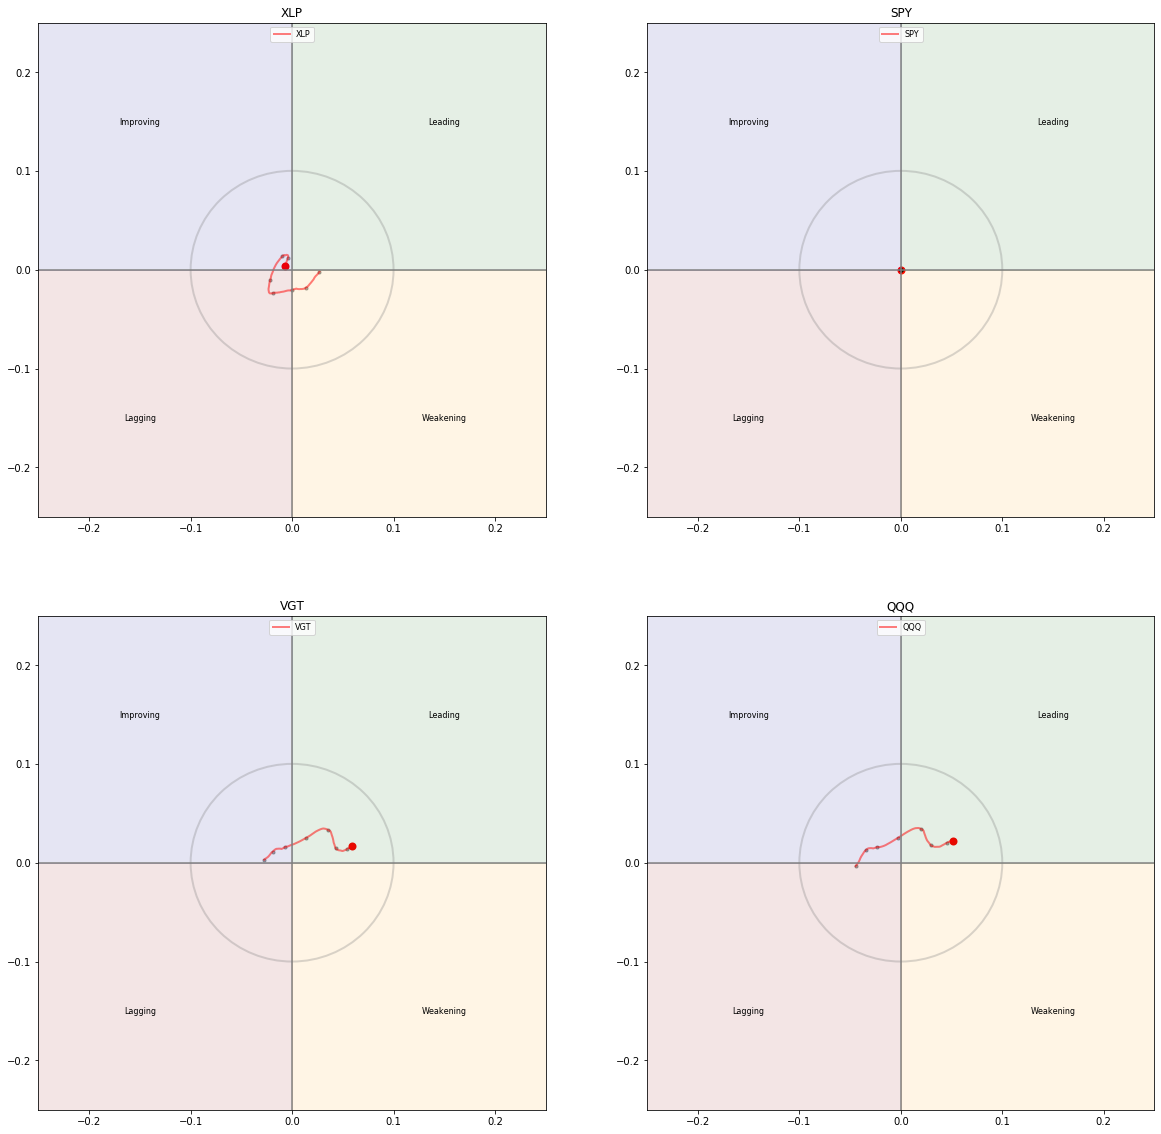

In [10]:
# Default ETF names
etf_names = ['XLP', 'SPY', 'VGT', 'QQQ']

# Visualize the Top 4 ETFs of importance
rrg.visualize_rrg(etf_names, jdk_rs_ratios, jdk_rs_momentums, rs_ratios, trailing_days=90)

In [10]:
coordinates[coordinates['ETF'] == 'GLD'].tail(20)

,ETF,Date,Current X,Current Y,Current Category,Current Signal Strength,Historic X,Historic Y,Angle between Historic and Current,Projected X,Projected Y,Projected Category,Projected Signal Strength
13588,GLD,2023-04-28,0.052076,0.013701,Leading,Weak Signal,0.046603,0.009632,0.639347,0.057550,0.017771,Leading,Weak Signal
13589,GLD,2023-05-01,0.052970,0.015278,Leading,Weak Signal,0.047300,0.009851,0.763482,0.058640,0.020705,Leading,Weak Signal
13590,GLD,2023-05-02,0.054121,0.016594,Leading,Weak Signal,0.048343,0.010711,0.794410,0.059898,0.022477,Leading,Weak Signal
13591,GLD,2023-05-03,0.055233,0.017022,Leading,Weak Signal,0.049731,0.011810,0.758421,0.060734,0.022235,Leading,Weak Signal
13592,GLD,2023-05-04,0.056532,0.017744,Leading,Weak Signal,0.050812,0.012583,0.733952,0.062253,0.022904,Leading,Weak Signal
13593,GLD,2023-05-05,0.057323,0.018385,Leading,Weak Signal,0.052076,0.013701,0.728772,0.062569,0.023068,Leading,Weak Signal
13594,GLD,2023-05-08,0.058076,0.018667,Leading,Weak Signal,0.052970,0.015278,0.585929,0.063183,0.022056,Leading,Weak Signal
13595,GLD,2023-05-09,0.059059,0.019094,Leading,Weak Signal,0.054121,0.016594,0.468640,0.063997,0.021594,Leading,Weak Signal
13596,GLD,2023-05-10,0.059759,0.019482,Leading,Weak Signal,0.055233,0.017022,0.497845,0.064286,0.021943,Leading,Weak Signal
13597,GLD,2023-05-11,0.060211,0.019375,Leading,Weak Signal,0.056532,0.017744,0.417358,0.063890,0.021006,Leading,Weak Signal
